In [26]:
import os
import re
import pandas as pd
import json

folder_path = "/home/snt/projects_lujun/temperature_eval_github/temperature_eval/data/Results_Final/evaluation"

dfs = []

for filename in os.listdir(folder_path):
    if filename.endswith(".jsonl"):
        file_path = os.path.join(folder_path, filename)

        with open(file_path, "r") as file:
            records = [json.loads(line) for line in file if line.strip()]
            df = pd.DataFrame(records)
            if "Qwen2.5-1.5B-Instruct" in filename:
                model_name = "Qwen2.5-1.5B-Instruct"
            elif "Phi-3.5-mini-instruct" in filename:
                model_name = "Phi-3.5-mini-instruct"
            elif "Llama-3.2-3B-Instruct" in filename:
                model_name = "Llama-3.2-3B-Instruct"
            elif "Qwen2.5-3B-Instruct" in filename:
                model_name = "Qwen2.5-3B-Instruct"
            elif "Llama-3.2-1B-Instruct" in filename:
                model_name = "Llama-3.2-1B-Instruct"
            elif "Llama-2-7b-chat-hf" in filename:
                model_name = "Llama-2-7b-chat-hf"
            elif "Llama-2-13b-chat-hf" in filename:
                model_name = "Llama-2-13b-chat-hf"
            elif "Llama-2-70b-chat-hf" in filename:
                model_name = "Llama-2-70b-chat-hf"
            elif "Meta-Llama-3-8B-Instruct" in filename:
                model_name = "Meta-Llama-3-8B-Instruct"
            elif "Meta-Llama-3-70B-Instruct" in filename:
                model_name = "Meta-Llama-3-70B-Instruct"
            elif "Mistral-7B-Instruct-v0.2" in filename:
                model_name = "Mistral-7B-Instruct-v0.2"
            elif "Mixtral-8x7B-Instruct-v0.1" in filename:
                model_name = "Mixtral-8x7B-Instruct-v0.1"
            else:
                model_name = "Unknown"
            df["model_name"] = model_name
            if "accuracy" in df.columns:
                df["accuracy"] = df["accuracy"].astype(float)
            else:
                df["accuracy"] = df.apply(
                    lambda row: (
                        row[f"{row['category']}_accuracy"]
                        if f"{row['category']}_accuracy" in df.columns
                        else None
                    ),
                    axis=1,
                )
            df["temperature"] = pd.to_numeric(df["temperature"], errors="coerce")
            df["temperature"] = df["temperature"].apply(
                lambda x: round(x, 2) if pd.notna(x) else x
            )
            columns_to_keep = ["model_name", "temperature", "category", "accuracy"]
            df = df[columns_to_keep]
            dfs.append(df)

df = pd.concat(dfs, ignore_index=True)



In [27]:
test_df = pd.read_json("/home/snt/projects_lujun/temperature_eval_github/temperature_eval/data/Additional_Results/full_size/evaluation/evaluated_gpt-3.5-turbo_vllm_exp_dataset_csv_Llama-3.2-1B-Instruct__20250106_013932_CT.jsonl",lines=True)

In [29]:
test_df = test_df[["input","seed"]]

In [30]:
test_df.head(10).to_csv("test.csv",index=False)

In [23]:
df_avg_accuracy = df.groupby(['model_name', 'temperature', 'category'])['accuracy'].mean().reset_index()
df_avg_accuracy["temperature"] = df_avg_accuracy["temperature"].astype(float).round(2)
df_avg_accuracy["accuracy"] = df_avg_accuracy["accuracy"].astype(float).round(3)

df_avg_accuracy["temperature"] = df_avg_accuracy["temperature"].apply(
    lambda x: f"{x:.4g}" 
)

df_avg_accuracy["accuracy"] = df_avg_accuracy["accuracy"].apply(
    lambda x: f"{x:.4g}" 
)

df_avg_accuracy["accuracy"] = df_avg_accuracy["accuracy"].round(2)

df_avg_accuracy["temperature"] = df_avg_accuracy["temperature"].round(2)

In [24]:
df_avg_accuracy.to_json("temperature_eval.jsonl", orient="records", lines=True)

## Draw the results

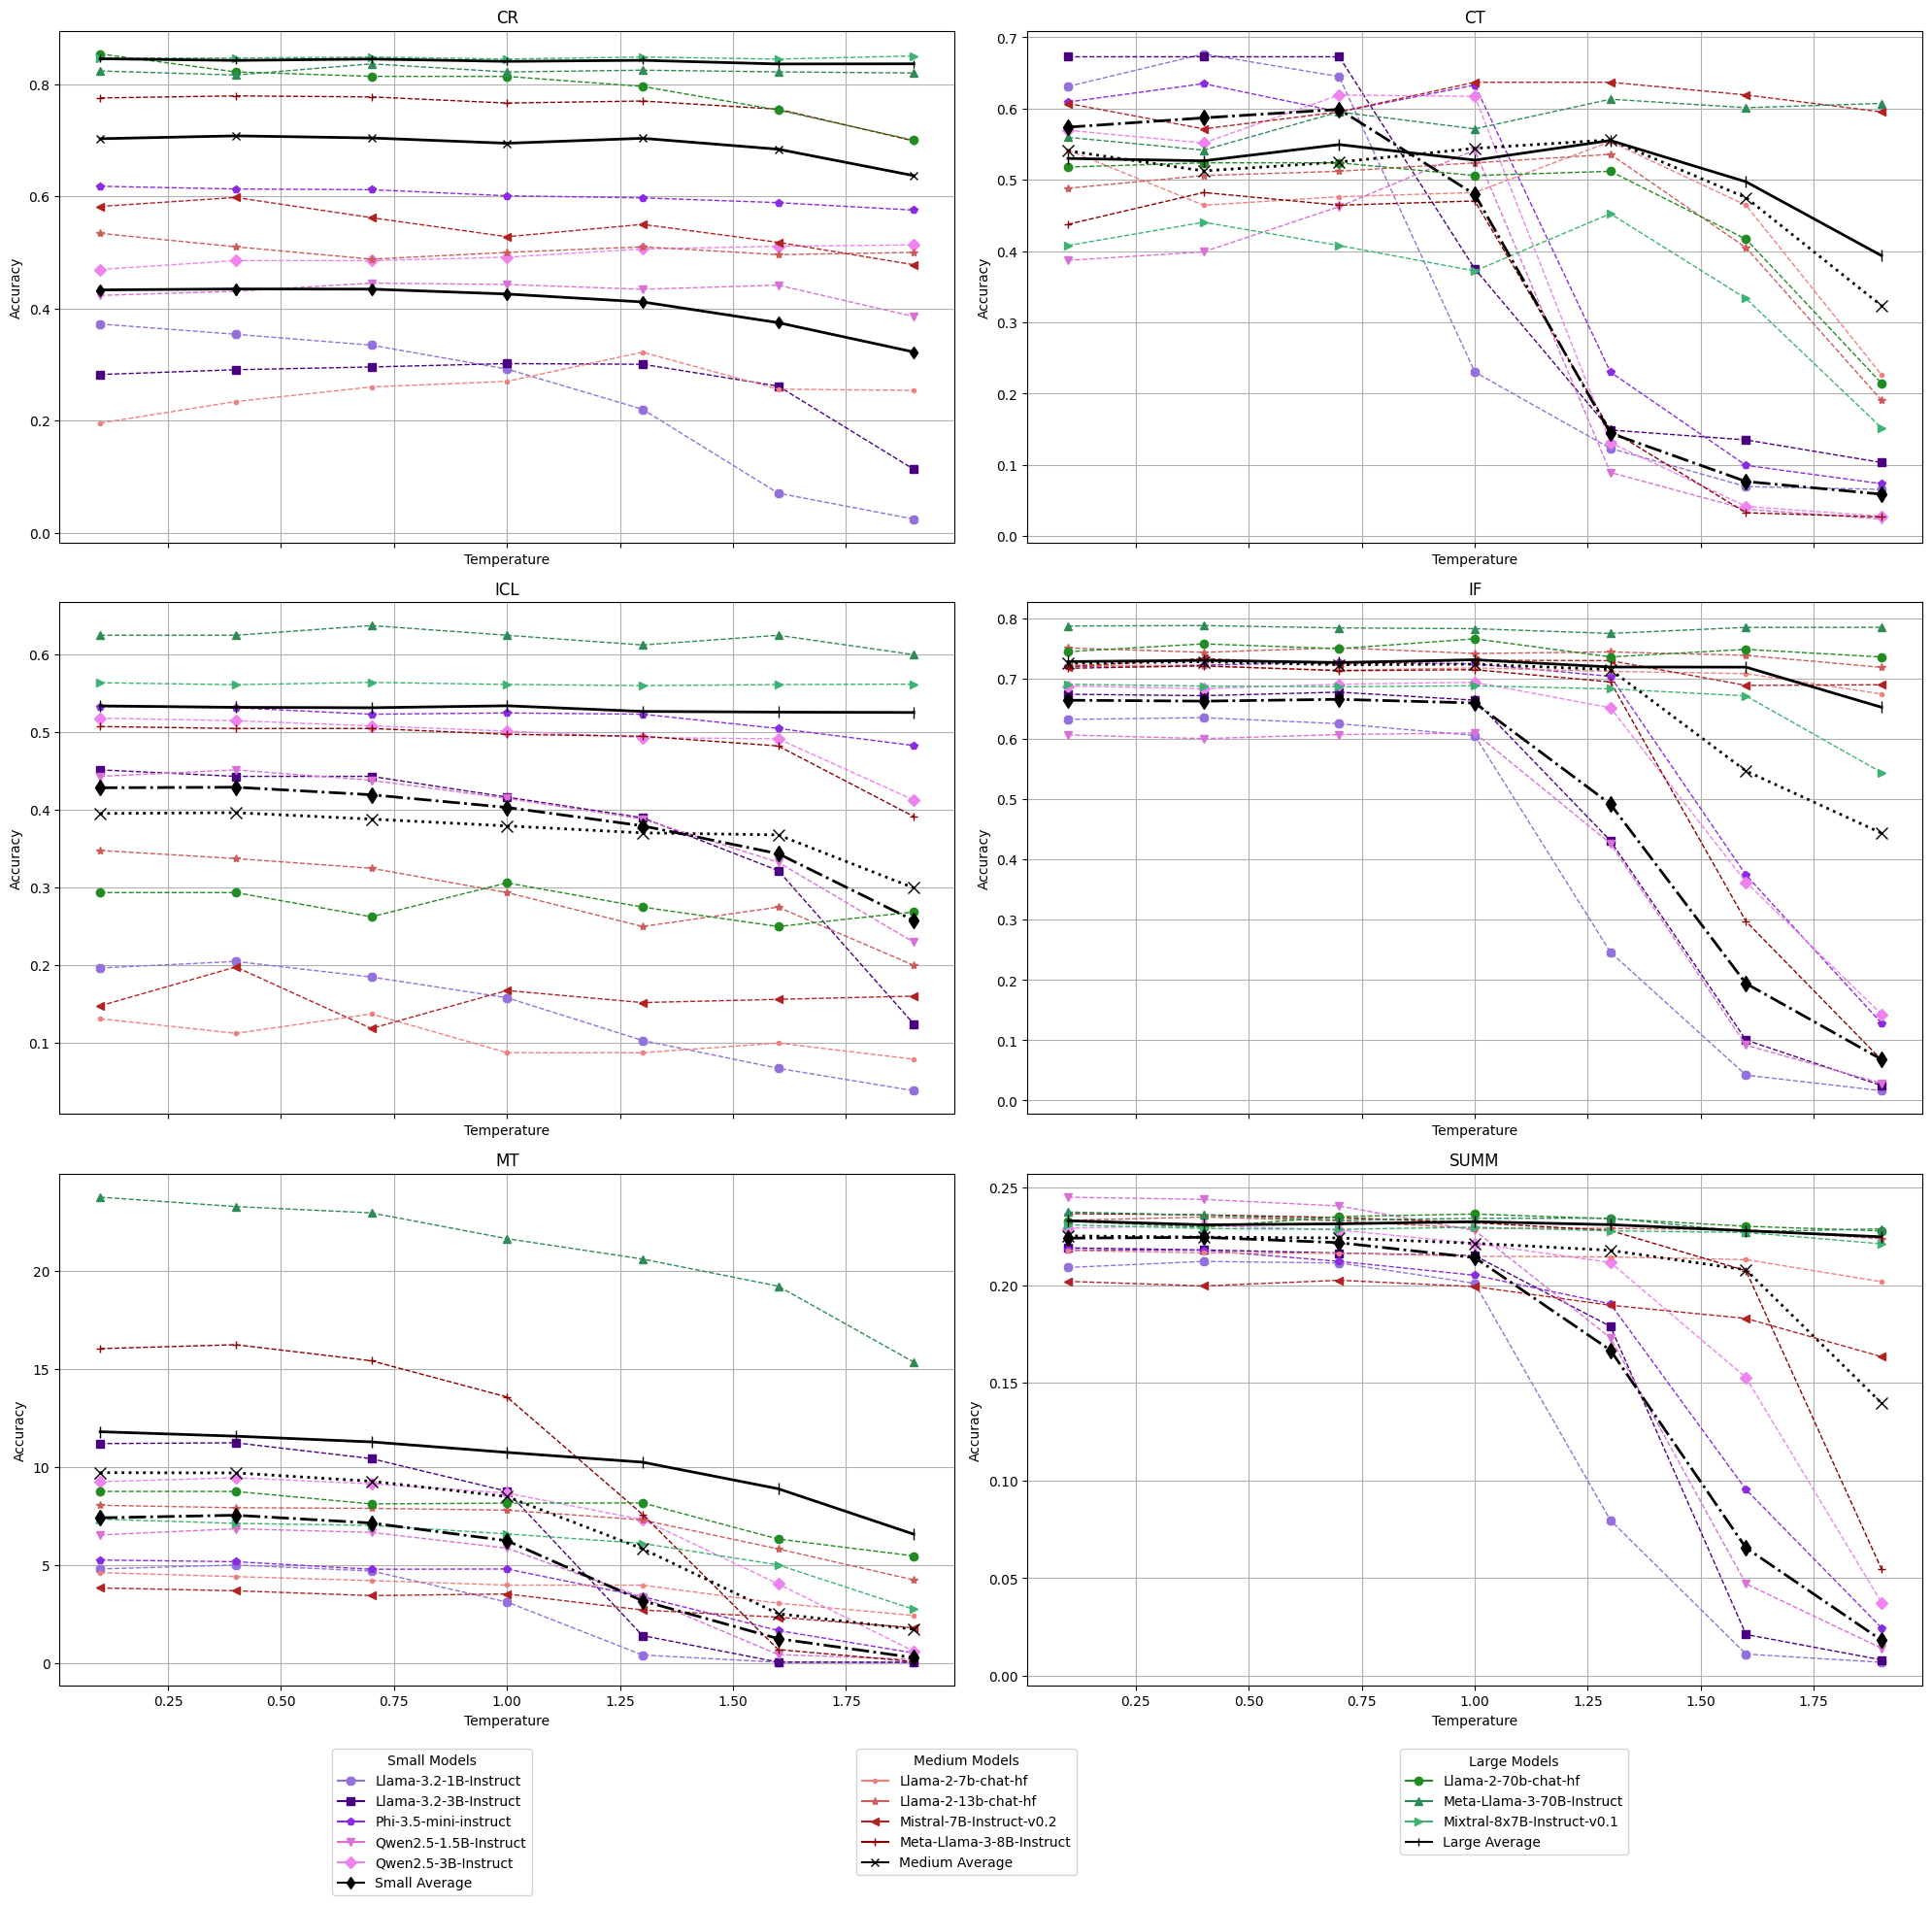

In [4]:
import matplotlib.pyplot as plt

# Example color_map and model_marker_map
color_map = {
    "Llama-2-7b-chat-hf": "lightcoral",  # medium
    "Llama-2-13b-chat-hf": "indianred",  # medium
    "Llama-2-70b-chat-hf": "forestgreen",  # large
    "Meta-Llama-3-8B-Instruct": "darkred",  # medium
    "Meta-Llama-3-70B-Instruct": "seagreen",  # large
    "Mistral-7B-Instruct-v0.2": "firebrick",  # medium
    "Mixtral-8x7B-Instruct-v0.1": "mediumseagreen",  # large
    "Llama-3.2-1B-Instruct": "mediumpurple",  # small (light red)
    "Llama-3.2-3B-Instruct": "indigo",  # small (dark red)
    "Phi-3.5-mini-instruct": "blueviolet",  # small (bright red)
    "Qwen2.5-1.5B-Instruct": "orchid",  # small (another shade of red)
    "Qwen2.5-3B-Instruct": "violet",  # small (another red shade)
    "Small Average": "black",  # small
    "Medium Average": "black",  # medium
    "Large Average": "black",  # large
}

size_map = {
    "Small Average": ["Llama-3.2-1B-Instruct", "Llama-3.2-3B-Instruct","Phi-3.5-mini-instruct","Qwen2.5-1.5B-Instruct","Qwen2.5-3B-Instruct"], 
    "Medium Average": ["Llama-2-7b-chat-hf","Llama-2-13b-chat-hf","Mistral-7B-Instruct-v0.2","Meta-Llama-3-8B-Instruct"], 
    "Large Average": ["Llama-2-70b-chat-hf","Meta-Llama-3-70B-Instruct","Mixtral-8x7B-Instruct-v0.1"]
}

# size_map = {
#     "Small Average": ["Llama-3.2-1B-Instruct","Phi-3.5-mini-instruct","Qwen2.5-1.5B-Instruct"], 
#     "Medium Average": ["Llama-2-7b-chat-hf","Mistral-7B-Instruct-v0.2","Meta-Llama-3-8B-Instruct"], 
#     "Large Average": ["Llama-2-70b-chat-hf","Meta-Llama-3-70B-Instruct","Mixtral-8x7B-Instruct-v0.1"]
# }

dash_line_map = {
    "Small Average": "-.",
    "Medium Average": ":",
    "Large Average": "-",
}

unique_model_list = [model for models in size_map.values() for model in models]
for model_cat in size_map.keys():
    unique_model_list.append(model_cat)

model_sizes = ["Small Average", "Medium Average", "Large Average"]
model_order = list(color_map.keys())
markers = [".", "*", "o", "+", "^", "<", ">", "8", "s", "p", "v", "D", "d", "x", "|", "_"] 
model_marker_map = {model: markers[i] for i, model in enumerate(model_order)}

# Grouped data (example setup, replace `df` with your DataFrame)
# Replace the below with your grouped dataset
grouped = df.groupby(["category", "model_name", "temperature"]).accuracy.mean().reset_index()

model_to_size = {}
for size, models in size_map.items():
    for model in models:
        model_to_size[model] = size

# Add the size category to the DataFrame
df['size'] = df['model_name'].map(model_to_size)

# Group by 'category', 'size', and 'temperature', then calculate the mean accuracy
grouped_avg = df.groupby(['category', 'size', 'temperature'])['accuracy'].mean().reset_index()
grouped_avg["model_name"] = grouped_avg["size"]

combined_grouped = pd.concat([grouped, grouped_avg], axis=0, ignore_index=True )
grouped = combined_grouped
categories = grouped["category"].unique()
categories = ["CR", "CT", "ICL", "IF", "MT", "SUMM"]
# Create a 3-row, 2-column grid for subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 18), sharex=True)

# Flatten the axes for easy iteration
axes = axes.flatten()
added_labels = set()

for i, category in enumerate(categories):
    ax = axes[i]
    subset = grouped[grouped["category"] == category]
    for model_name in unique_model_list:
        model_data = subset[subset["model_name"] == model_name]
        if model_name not in added_labels:
            if model_name not in model_sizes:
                ax.plot(
                model_data["temperature"],
                model_data["accuracy"],
                label=model_name,
                marker=model_marker_map[model_name],
                color=color_map[model_name],
                linestyle="--",
                linewidth=1
            )
            else:
                ax.plot(
                model_data["temperature"],
                model_data["accuracy"],
                label=model_name,
                marker=model_marker_map[model_name],
                color=color_map[model_name],
                linewidth=2,
                )
                
            added_labels.add(model_name)
        else:
            if model_name not in model_sizes:
                ax.plot(
                model_data["temperature"],
                model_data["accuracy"],
                # label=model_name,
                marker=model_marker_map[model_name],
                color=color_map[model_name],
                linestyle="--",
                linewidth=1
            )
            else:
                ax.plot(
                model_data["temperature"],
                model_data["accuracy"],
                # label=model_name,
                marker=model_marker_map[model_name],
                color=color_map[model_name],
                linestyle=dash_line_map[model_name],
                linewidth=2,
                markersize=8
                )
    ax.set_title(f"{category}")
    ax.set_xlabel("Temperature")
    ax.set_ylabel("Accuracy")
    ax.grid(True)



handles = []
labels = []

# Create handles and labels for small models
for model_name in size_map["Small Average"]:
    handle, = ax.plot([], [], label=model_name, marker=model_marker_map[model_name], color=color_map[model_name])
    handles.append(handle)
    labels.append(f"{model_name}")

model_name = "Small Average"
handle, = ax.plot([], [], label=model_name, marker=model_marker_map[model_name], color=color_map[model_name])
handles.append(handle)
labels.append(f"{model_name}")

# Create handles and labels for medium models
for model_name in size_map["Medium Average"]:
    handle, = ax.plot([], [], label=model_name, marker=model_marker_map[model_name], color=color_map[model_name])
    handles.append(handle)
    labels.append(f"{model_name}")

model_name = "Medium Average"
handle, = ax.plot([], [], label=model_name, marker=model_marker_map[model_name], color=color_map[model_name])
handles.append(handle)
labels.append(f"{model_name}")

# Create handles and labels for large models
for model_name in size_map["Large Average"]:
    handle, = ax.plot([], [], label=model_name, marker=model_marker_map[model_name], color=color_map[model_name])
    handles.append(handle)
    labels.append(f"{model_name}")

model_name = "Large Average"
handle, = ax.plot([], [], label=model_name, marker=model_marker_map[model_name], color=color_map[model_name])
handles.append(handle)
labels.append(f"{model_name}")


# Add the custom legend with models ordered by size and grouped by model size type
fig.legend(
    handles=handles[:len(size_map["Small Average"])+1],  # small models first
    labels=labels[:len(size_map["Small Average"])+1],  # corresponding labels
    loc="upper left",
    bbox_to_anchor=(0.17, 0.00),  # Position the legend below the plot, left-aligned
    ncol=1,  # 1 column for small models
    title="Small Models",
    columnspacing=1.5,
    
)

# Add legend for medium models
fig.legend(
    handles=handles[len(size_map["Small Average"])+1:len(size_map["Small Average"]) +1+ len(size_map["Medium Average"])+1],  # medium models
    labels=labels[len(size_map["Small Average"])+1:len(size_map["Small Average"])+1 + len(size_map["Medium Average"])+1],  # corresponding labels
    loc="upper left",
    bbox_to_anchor=(0.44, 0.00),  # Position the legend below the plot, centered
    ncol=1,  # 1 column for medium models
    title="Medium Models",
    columnspacing=1.5,
)

# Add legend for large models
fig.legend(
    handles=handles[len(size_map["Small Average"])+1 + len(size_map["Medium Average"])+1:],  # large models
    labels=labels[len(size_map["Small Average"])+1 + len(size_map["Medium Average"])+1:],  # corresponding labels
    loc="upper left",
    bbox_to_anchor=(0.72, 0.00),  # Position the legend below the plot, right-aligned
    ncol=1,  # 1 column for large models
    title="Large Models",
    columnspacing=1.5,
)

fig.tight_layout()
plt.show()


## Draw the results only for average

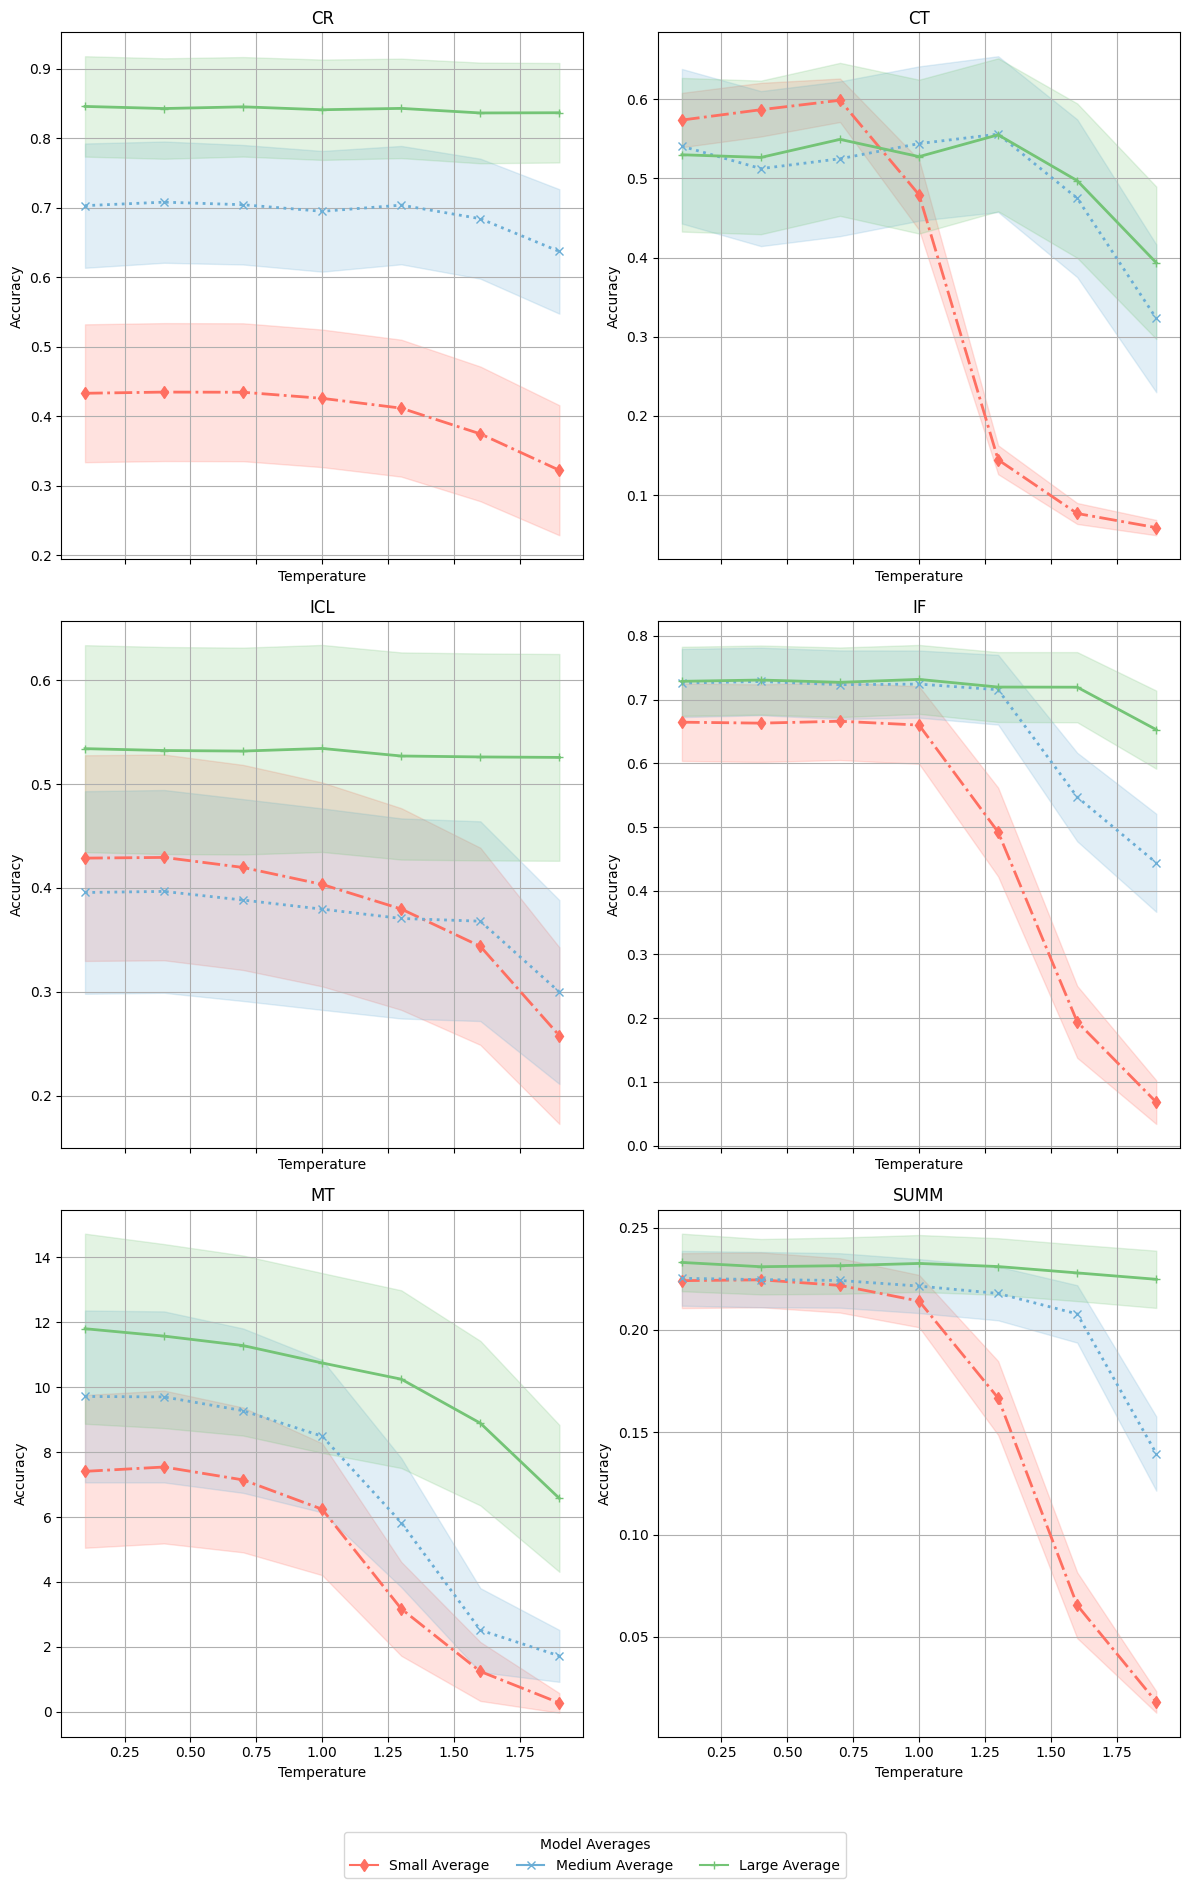

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  # 用于生成示例数据

# Color and line style mappings
color_map = {
    "Small Average": "#FF6F61",
    "Medium Average": "#6BAED6",
    "Large Average": "#74C476",
}

dash_line_map = {
    "Small Average": "-.",
    "Medium Average": ":",
    "Large Average": "-",
}

marker_map = {
    "Small Average": "d",
    "Medium Average": "x",
    "Large Average": "+",
}


grouped_avg = df.groupby(['category', 'size', 'temperature'])['accuracy'].agg(
    mean='mean',
    std='std'
).reset_index()
categories = grouped_avg["category"].unique()

# Create a grid for subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 18), sharex=True)
axes = axes.flatten()

for i, category in enumerate(categories):
    ax = axes[i]
    subset = grouped_avg[grouped_avg["category"] == category]
    for size in ["Small Average", "Medium Average", "Large Average"]:
        size_data = subset[subset["size"] == size]
        ax.plot(
            size_data["temperature"],
            size_data["mean"],
            label=size,
            color=color_map[size],
            linestyle=dash_line_map[size],
            linewidth=2,
            marker=marker_map[size],
        )
        ax.fill_between(
            size_data["temperature"],
            size_data["mean"] - 0.2*size_data["std"],
            size_data["mean"] + 0.2*size_data["std"],
            color=color_map[size],
            alpha=0.2,
        )
    ax.set_title(f"{category}")
    ax.set_xlabel("Temperature")
    ax.set_ylabel("Accuracy")
    ax.grid(True)

# Add legend handles manually
handles, labels = [], []

# Small Average
model_name = "Small Average"
handle, = axes[0].plot([], [], label=model_name, marker=marker_map[model_name], color=color_map[model_name])
handles.append(handle)
labels.append(model_name)

# Medium Average
model_name = "Medium Average"
handle, = axes[0].plot([], [], label=model_name, marker=marker_map[model_name], color=color_map[model_name])
handles.append(handle)
labels.append(model_name)

# Large Average
model_name = "Large Average"
handle, = axes[0].plot([], [], label=model_name, marker=marker_map[model_name], color=color_map[model_name])
handles.append(handle)
labels.append(model_name)

# Add the custom legend to the figure
fig.legend(
    handles=handles,
    labels=labels,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.05),
    ncol=3,
    title="Model Averages",
    frameon=True
)

# Adjust layout
fig.tight_layout()
plt.show()


In [73]:
from scipy.stats import kendalltau
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [ ]:
for cat in categories:
    data = df[df["category"] == cat]
    data = data.dropna(subset=["accuracy"])
    data = data.dropna(subset=["temperature"])
    temperatures = data["temperature"].values
    accuracy = data["accuracy"].values
    accuracy = (accuracy - np.min(accuracy)) / (np.max(accuracy) - np.min(accuracy))
    corr, p_value = spearmanr(temperatures, accuracy)
    corr_pearson, p_value_pearson = pearsonr(temperatures, accuracy)
    temperatures = sm.add_constant(temperatures)
    model = sm.OLS(accuracy, temperatures).fit()
    predictions = model.predict(temperatures)
    se = np.sqrt(mean_squared_error(accuracy, predictions))
    r_squared = model.rsquared
    r_squared_adj = model.rsquared_adj
    beta_hat = model.params

    grouped_data = data.groupby(["temperature"])["accuracy"].mean().reset_index()

    average_performance = grouped_data["accuracy"].mean()

    standard_deviation = grouped_data["accuracy"].std()

    range_value = grouped_data["accuracy"].max() - grouped_data["accuracy"].min()
    statistical_range_percentage = (range_value / average_performance) * 100

    coefficient_of_variation = (standard_deviation / average_performance) * 100

    average_performance, standard_deviation, statistical_range_percentage, coefficient_of_variation

    print ("-----"*10)
    print (f"categroy: {cat}")
    print(f"Pearson correlation Coefficient: {corr_pearson:.3f}")
    print(f"Pearson_p_value: {p_value_pearson:.3f}")
    print(f"Spearman correlation Coefficient: {corr:.3f}")
    print(f"p_value: {p_value:.3f}")
    print(f"Range Percentage: {statistical_range_percentage:.3f}%")
    print(f"Coefficient of Variation: {coefficient_of_variation:.3f}")

    print(f"Average Performance: {average_performance:.3f}")
    
   
    # print(f"Standard Deviation: {standard_deviation:.3f}")
    
    


--------------------------------------------------
categroy: CR
Pearson correlation Coefficient: -0.066
Pearson_p_value: 0.000
Spearman correlation Coefficient: -0.066
p_value: 0.000
Range Percentage: 25.387%
Coefficient of Variation: 9.587
Average Performance: 0.421
--------------------------------------------------
categroy: CT
Pearson correlation Coefficient: -0.141
Pearson_p_value: 0.000
Spearman correlation Coefficient: -0.103
p_value: 0.000
Range Percentage: 47.415%
Coefficient of Variation: 17.507
Average Performance: 0.475
--------------------------------------------------
categroy: ICL
Pearson correlation Coefficient: -0.097
Pearson_p_value: 0.000
Spearman correlation Coefficient: -0.090
p_value: 0.000
Range Percentage: 41.114%
Coefficient of Variation: 14.880
Average Performance: 0.373
--------------------------------------------------
categroy: IF
Pearson correlation Coefficient: -0.398
Pearson_p_value: 0.000
Spearman correlation Coefficient: -0.367
p_value: 0.000
Range Perc

In [ ]:
grouped_data = data.groupby(["model_name", "temperature"])["accuracy"].mean().reset_index()


results = []


for model, group in grouped_data.groupby("model_name"):
    average_performance = group["accuracy"].mean()
    standard_deviation = group["accuracy"].std()
    range_value = group["accuracy"].max() - group["accuracy"].min()
    
    statistical_range_percentage = (range_value / average_performance) * 100
    coefficient_of_variation = (standard_deviation / average_performance) * 100

    results.append({
        "model": model,
        "coefficient_of_variation": coefficient_of_variation,
        "statistical_range_percentage": statistical_range_percentage
    })

results_df = pd.DataFrame(results)

cv_max = results_df["coefficient_of_variation"].max()
cv_min = results_df["coefficient_of_variation"].min()

range_max = results_df["statistical_range_percentage"].max()
range_min = results_df["statistical_range_percentage"].min()


print("\nSummary Statistics:")
print(f"Max CV: {cv_max:.2f}, Min CV: {cv_min:.2f}")
print(f"Max Range Percentage: {range_max:.2f}%, Min Range Percentage: {range_min:.2f}%")